In [1]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('data/InternetMobileTime.csv')
df.head()

,Minutes
0,72
1,144
2,48
3,72
4,36


In [3]:
sd = df.Minutes.std()
sd

142.1850594577536

In [4]:
dist = stats.t.rvs(df=28, loc=144, scale=sd, size=100000)

(-350.0, 750.0)

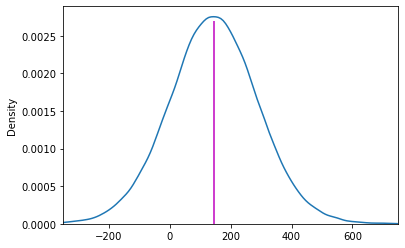

In [5]:
sns.kdeplot(dist)
plt.vlines(x=144, ymax=0.0027, ymin=0, color='m')
plt.xlim(-350,750)

In [6]:
statistic = (df.Minutes.mean() - 144)/sd *np.sqrt( len(df.Minutes))
statistic

1.2250388885748442

(-4.0, 4.0)

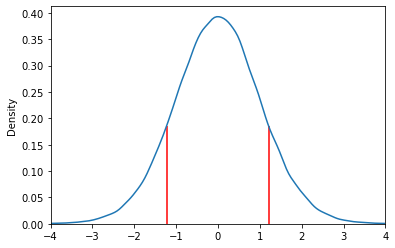

In [7]:
dist = stats.t.rvs(df=28, loc=0, scale=1, size=100000)

prob = stats.t.pdf(statistic, df=28)
sns.kdeplot(dist)

#plt.vlines(x=0, ymax=0.4, ymin=0, color='m')

plt.vlines(x=statistic, ymax=prob, ymin=0, color='r')
plt.vlines(x=-statistic, ymax=prob, ymin=0, color='r')
plt.xlim(-4,4)

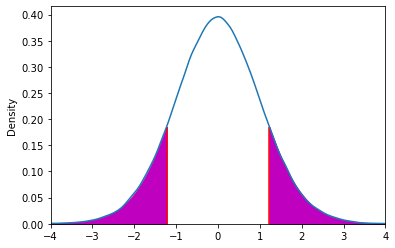

In [8]:
dist = stats.t.rvs(df=28, loc=0, scale=1, size=100000)

prob = stats.t.pdf(statistic, df=28)
sns.kdeplot(dist)

#plt.vlines(x=0, ymax=0.4, ymin=0, color='m')

plt.vlines(x=statistic, ymax=prob, ymin=0, color='r')
plt.vlines(x=-statistic, ymax=prob, ymin=0, color='r')
x1 = np.arange(statistic,4,0.001)
y1 = stats.t.pdf(x1, df=28)

x2 = np.arange(-4,-statistic,0.001)
y2 = stats.t.pdf(x2, df=28)

plt.fill_between(x1,y1, color='m')
plt.fill_between(x2,y2, color='m')
plt.xlim(-4,4);

In [9]:
stats.t.cdf(-statistic, df=28)*2

0.23076657128249872